In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30

In [101]:
HTS = pd.read_csv("01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv", encoding = "cp949")
players = pd.read_csv("01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2020.csv", encoding ="cp949")
batter_base = pd.read_csv("01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2020.csv", encoding = "cp949")
team = pd.read_csv("01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_팀.csv", encoding = "cp949")
score = pd.read_csv("01_제공데이터/20년득점타점.csv")

In [41]:
predict_name_list = ["양의지", "강백호", "최정", "이정후", "채은성", "김재환", "전준우", "김현수", "박건우", "로맥"]

In [42]:
print(HTS.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34502 entries, 0 to 34501
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GYEAR        34502 non-null  int64  
 1   G_ID         34502 non-null  object 
 2   PIT_ID       34502 non-null  object 
 3   PCODE        34502 non-null  int64  
 4   T_ID         34502 non-null  object 
 5   INN          34502 non-null  int64  
 6   HIT_VEL      34502 non-null  float64
 7   HIT_ANG_VER  34502 non-null  float64
 8   HIT_RESULT   34502 non-null  object 
 9   PIT_VEL      34502 non-null  float64
 10  STADIUM      34502 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 2.9+ MB
None


In [43]:
len(HTS["PIT_ID"].unique())

34274

In [44]:
HTS.describe()

,GYEAR,PCODE,INN,HIT_VEL,HIT_ANG_VER,PIT_VEL
count,34502.0,34502.000000,34502.000000,34502.000000,34502.000000,34502.000000
mean,2020.0,68872.320793,4.953800,134.893281,18.471996,136.023569
std,0.0,7918.150579,2.591064,19.456567,23.827191,9.024834
min,2020.0,50054.000000,1.000000,39.270000,-53.700000,82.500000
25%,2020.0,63440.000000,3.000000,123.320000,-0.500000,129.810000
50%,2020.0,68305.000000,5.000000,138.120000,15.300000,137.830000
75%,2020.0,76267.000000,7.000000,149.530000,33.200000,142.970000
max,2020.0,79705.000000,12.000000,181.870000,89.800000,158.190000


In [45]:
print(players.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   GYEAR     684 non-null    int64 
 1   PCODE     684 non-null    int64 
 2   NAME      684 non-null    object
 3   T_ID      684 non-null    object
 4   POSITION  684 non-null    object
 5   AGE_VA    684 non-null    int64 
 6   MONEY     683 non-null    object
dtypes: int64(3), object(4)
memory usage: 37.5+ KB
None


In [46]:
print(batter_base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GYEAR    286 non-null    int64  
 1   PCODE    286 non-null    int64  
 2   GAMENUM  286 non-null    int64  
 3   PA       286 non-null    int64  
 4   AB       286 non-null    int64  
 5   BA       286 non-null    float64
 6   HIT      286 non-null    int64  
 7   HR       286 non-null    int64  
 8   TOTB     286 non-null    int64  
 9   SLG      286 non-null    float64
 10  SF       286 non-null    int64  
 11  BB       286 non-null    int64  
 12  KK       286 non-null    int64  
 13  IB       286 non-null    int64  
 14  HP       286 non-null    int64  
 15  GD       286 non-null    int64  
dtypes: float64(2), int64(14)
memory usage: 35.9 KB
None


In [47]:
print(len(list(players["PCODE"])))
print(len(list(HTS["PCODE"])))
print(len(list(batter_base["PCODE"])))
print("\n")

print(len(set(list(players["PCODE"]))))
print(len(set(list(HTS["PCODE"]))))
print(len(set(list(batter_base["PCODE"]))))
print("\n")


print(len(set(list(HTS["PCODE"])).intersection(set(list(players["PCODE"])))))
print(len(set(list(HTS["PCODE"])).intersection(set(list(batter_base["PCODE"])))))
print(len(set(list(players["PCODE"])).intersection(set(list(batter_base["PCODE"])))))
print("\n")

684
34502
286


684
279
286


279
279
286




In [118]:
PCODE = list(players["PCODE"])
NAME = list(players["NAME"])
AGE = list(players["AGE_VA"])

len(list(zip(PCODE, NAME)))

684

In [119]:
players_name_number = dict(list(zip(PCODE, NAME)))
players_age_number = dict(list(zip(PCODE, AGE)))

In [120]:
HTS["NAME"] = HTS["PCODE"].map(players_name_number)
batter_base["NAME"] = batter_base["PCODE"].map(players_name_number)


HTS["AGE_VA"] = HTS["PCODE"].map(players_age_number)
batter_base["AGE_VA"] = batter_base["PCODE"].map(players_age_number)

In [121]:
HTS.head(3)

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,NAME,AGE_VA
0,2020,20200505HHSK0,200505_140454,68743,HH,1,110.28,-20.2,2루타,144.39,문학,정은원,20
1,2020,20200505HHSK0,200505_140623,68730,HH,1,120.24,43.4,플라이,145.09,문학,호잉,31
2,2020,20200505HHSK0,200505_141146,63704,SK,1,127.87,-13.9,땅볼아웃,132.62,문학,노수광,29


In [122]:
players.head(3)

,GYEAR,PCODE,NAME,T_ID,POSITION,AGE_VA,MONEY
0,2020,50009,최지효,KT,내,18,2700만원
1,2020,50030,소형준,KT,투,18,2700만원
2,2020,50036,이강준,KT,투,18,2700만원


In [123]:
batter_base.head(3)

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,AGE_VA
0,2020,50054,66,77,69,0.203,14,0,17,0.246,0,7,15,0,1,0,천성호,22
1,2020,50066,26,32,30,0.200,6,1,11,0.367,0,2,11,0,0,1,강현우,19
2,2020,50150,23,31,30,0.367,11,0,13,0.433,0,1,6,0,0,2,손호영,25


In [124]:
team_dict = {
    "HH" : "한화",
    "HT" : "KIA",
    "KT" : "KT",
    "LG" : "LG",
    "LT" : "롯데",
    "NC" : "NC",
    "OB" : "두산",
    "SK" : "SSG",
    "SS" : "삼성",
    "WO" : "키움"
}

In [125]:
team_dict

{'HH': '한화',
 'HT': 'KIA',
 'KT': 'KT',
 'LG': 'LG',
 'LT': '롯데',
 'NC': 'NC',
 'OB': '두산',
 'SK': 'SSG',
 'SS': '삼성',
 'WO': '키움'}

In [126]:
HTS["T_ID"] = HTS["T_ID"].map(team_dict)
players["T_ID"] = players["T_ID"].map(team_dict)

In [127]:
HTS.head(3)

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,NAME,AGE_VA
0,2020,20200505HHSK0,200505_140454,68743,한화,1,110.28,-20.2,2루타,144.39,문학,정은원,20
1,2020,20200505HHSK0,200505_140623,68730,한화,1,120.24,43.4,플라이,145.09,문학,호잉,31
2,2020,20200505HHSK0,200505_141146,63704,SSG,1,127.87,-13.9,땅볼아웃,132.62,문학,노수광,29


C:\Users\qkfkd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


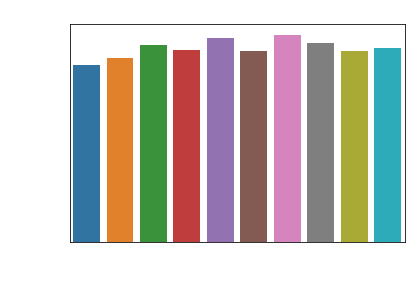

In [128]:
sns.countplot(HTS.T_ID)
plt.xticks(color="w", fontsize =15) #xticks 색상과 폰트 크기 조정
plt.yticks(color="w", fontsize =15) #xticks 색상과 폰트 크기 조정
plt.xlabel("팀이름", color = "w", fontsize = 15)
plt.ylabel("count", color = "w", fontsize = 15)
plt.title("팀별경기수", color = "w", fontsize = 15)

plt.show()

In [78]:
HTS.HIT_VEL.describe()

count    34502.000000
mean       134.893281
std         19.456567
min         39.270000
25%        123.320000
50%        138.120000
75%        149.530000
max        181.870000
Name: HIT_VEL, dtype: float64

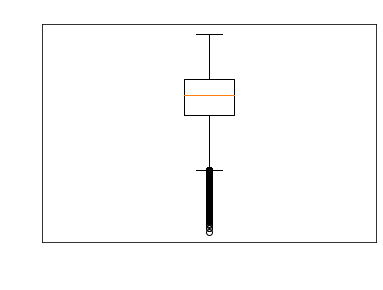

In [79]:
plt.boxplot(HTS.HIT_VEL)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.title("타구속도", color = "w", fontsize = 15)
plt.show()

In [80]:
HTS.HIT_VEL.describe()

count    34502.000000
mean       134.893281
std         19.456567
min         39.270000
25%        123.320000
50%        138.120000
75%        149.530000
max        181.870000
Name: HIT_VEL, dtype: float64

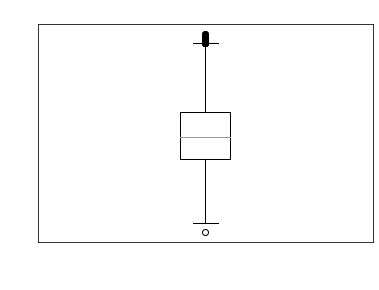

In [81]:
plt.boxplot(HTS.HIT_ANG_VER)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("발사각도", color = "w", fontsize = 15)
plt.show()

In [82]:
HTS.HIT_ANG_VER.describe()

count    34502.000000
mean        18.471996
std         23.827191
min        -53.700000
25%         -0.500000
50%         15.300000
75%         33.200000
max         89.800000
Name: HIT_ANG_VER, dtype: float64

C:\Users\qkfkd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


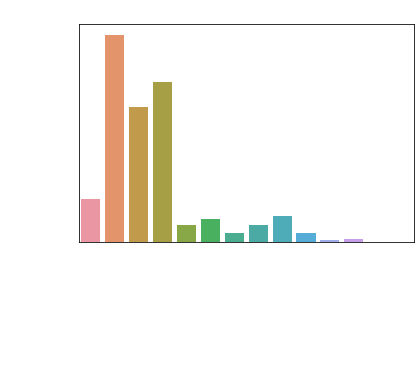

In [83]:
sns.countplot(HTS.HIT_RESULT)
plt.xticks(rotation = 90, color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", color = "w", fontsize = 13)
plt.ylabel("count", color = "w", fontsize = 15)
plt.title("타격결과", color = "w", fontsize = 15)
plt.show()

C:\Users\qkfkd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


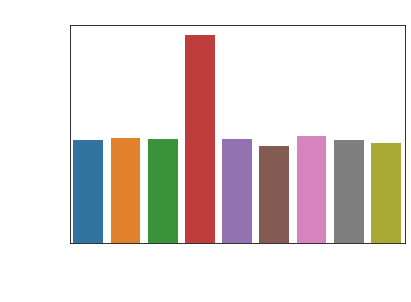

In [28]:
sns.countplot(HTS.STADIUM)
plt.xticks(rotation = 90, color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("STADIUM", color = "w", fontsize = 13)
plt.ylabel("count", color = "w", fontsize = 15)
plt.title("구장별경기수", color = "w", fontsize = 15)
plt.show()

Text(0.5, 1.0, '타구속도 별 발사각도')

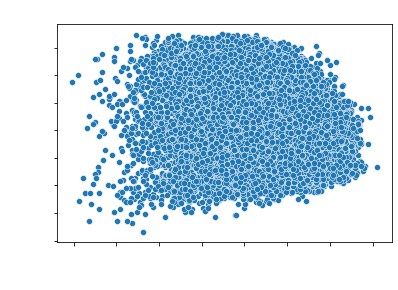

In [27]:
sns.scatterplot( x = "HIT_VEL", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("타구속도 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '타구속도 별 발사각도')

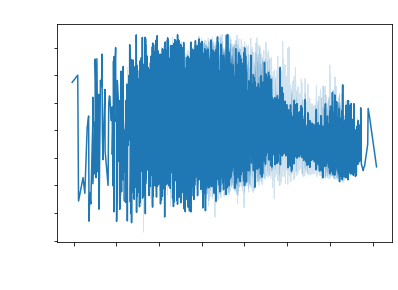

In [28]:
sns.lineplot( x = "HIT_VEL", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("타구속도 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '타격결과 별 발사각도')

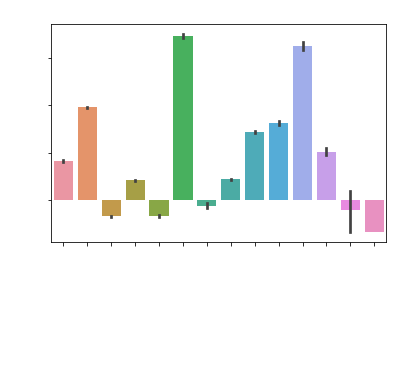

In [29]:
sns.barplot( x = "HIT_RESULT", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("타격결과 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '타격결과 별 발사각도')

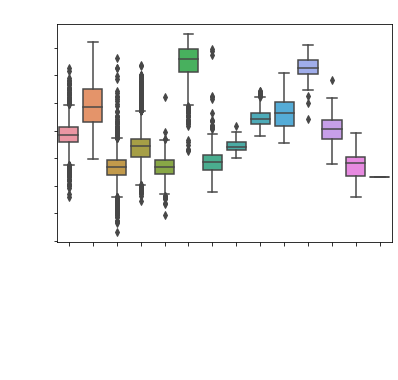

In [30]:
sns.boxplot( x = "HIT_RESULT", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("타격결과 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '타구속도 별 타격결과')

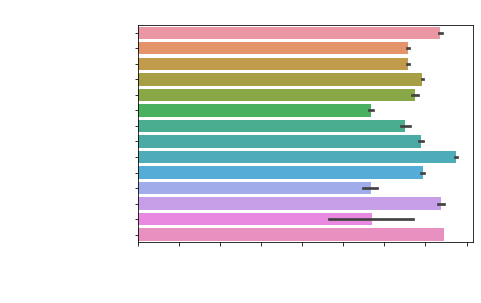

In [31]:
sns.barplot( x = "HIT_VEL", y = "HIT_RESULT", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_RESULT", fontsize = 15, color = "w")
plt.title("타구속도 별 타격결과", color = "w", fontsize = 15)


Text(0.5, 1.0, '타구속도 별 타격결과')

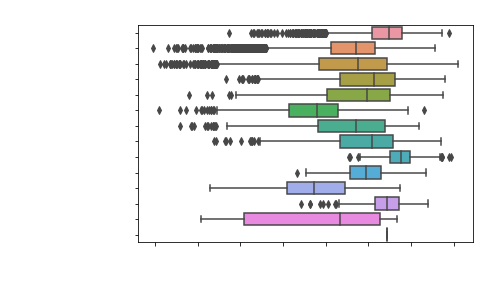

In [32]:
sns.boxplot( x = "HIT_VEL", y = "HIT_RESULT", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_RESULT", fontsize = 15, color = "w")
plt.title("타구속도 별 타격결과", color = "w", fontsize = 15)


Text(0.5, 1.0, '상대투수구속 별 발사각도')

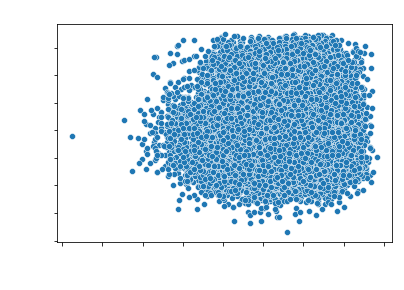

In [33]:
sns.scatterplot( x = "PIT_VEL", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("PIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("상대투수구속 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '상대투수구속 별 발사각도')

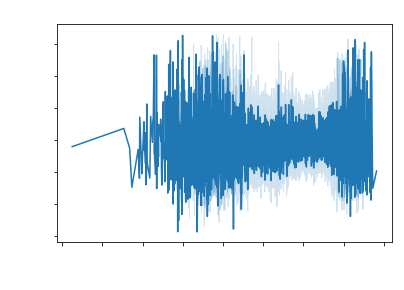

In [34]:
sns.lineplot( x = "PIT_VEL", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("PIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("상대투수구속 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '상대투수구속 별 타격결과')

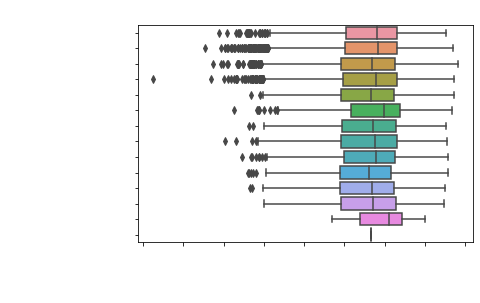

In [35]:
sns.boxplot( x = "PIT_VEL", y = "HIT_RESULT", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("PIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_RESULT", fontsize = 15, color = "w")
plt.title("상대투수구속 별 타격결과", color = "w", fontsize = 15)


Text(0.5, 1.0, '상대투수구속 별 타격결과')

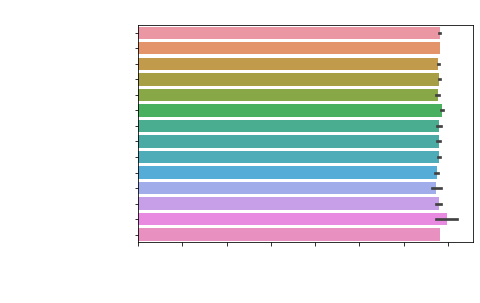

In [36]:
sns.barplot( x = "PIT_VEL", y = "HIT_RESULT", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("PIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_RESULT", fontsize = 15, color = "w")
plt.title("상대투수구속 별 타격결과", color = "w", fontsize = 15)


Text(0.5, 1.0, '구장 별 타구속도')

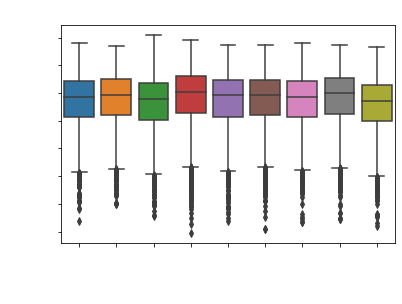

In [37]:
sns.boxplot( x = "STADIUM", y = "HIT_VEL", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("STADIUM", fontsize = 15, color = "w")
plt.ylabel("HIT_VEL", fontsize = 15, color = "w")
plt.title("구장 별 타구속도", color = "w", fontsize = 15)


Text(0.5, 1.0, '구장 별 발사각도')

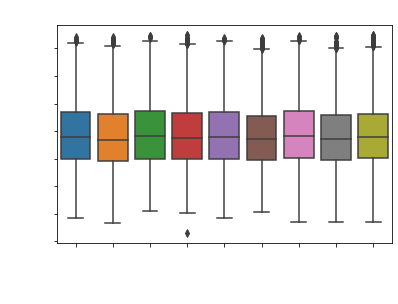

In [38]:
sns.boxplot( x = "STADIUM", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("STADIUM", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("구장 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '구장 별 상대투수투구구속')

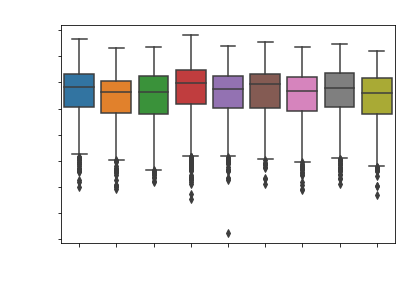

In [39]:
sns.boxplot( x = "STADIUM", y = "PIT_VEL", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("STADIUM", fontsize = 15, color = "w")
plt.ylabel("PIT_VEL", fontsize = 15, color = "w")
plt.title("구장 별 상대투수투구구속", color = "w", fontsize = 15)


In [40]:
pivot = HTS.pivot_table(index = "STADIUM", columns = "HIT_RESULT",values = "HIT_ANG_VER")

In [41]:
pivot

HIT_RESULT,1루타,2루타,3루타,내야안타(1루타),땅볼아웃,병살타,삼중살타,야수선택,인필드플라이,직선타,파울플라이,플라이,홈런,희생플라이
STADIUM,,,,,,,,,,,,,,
고척,7.131459,17.323333,19.176190,-3.167391,-7.260811,-6.357647,NaN,0.5,74.660000,8.249000,67.105882,38.319753,27.851000,31.223256
광주,8.814686,16.828936,21.104348,1.317647,-6.793931,-7.300000,-13.4,17.9,65.275000,8.335227,71.711719,39.747301,29.630597,32.480952
대구,8.070296,17.181614,21.954545,-2.312500,-6.273538,-7.107229,NaN,NaN,63.888889,8.406667,67.410769,39.984568,29.128488,30.216981
대전,9.444242,16.943946,18.666667,0.707895,-6.530583,-6.558427,NaN,NaN,66.350000,8.928571,69.140984,38.504368,28.866667,31.371875
문학,8.424878,16.061026,20.912500,-3.538095,-7.233524,-6.670833,NaN,-21.1,62.830000,9.201031,67.910274,38.967873,28.297633,32.247059
사직,7.942162,16.436162,24.630769,-6.700000,-6.936788,-6.281720,NaN,NaN,66.073333,8.893333,69.461062,38.356932,28.143262,34.013953
수원,7.696433,16.857872,24.840000,-3.449254,-6.698246,-6.968868,NaN,-3.8,65.353846,9.330973,71.835106,39.601590,28.846429,32.648148
잠실,8.824467,15.390950,18.013636,-0.354945,-6.566980,-6.998214,NaN,-2.6,64.361905,8.174866,67.629482,38.295098,28.873077,32.620354
창원,8.188710,16.789453,19.803846,-5.933333,-7.307375,-6.566667,NaN,NaN,61.850000,9.502198,70.321127,40.108282,29.032292,33.742308


Text(0.5, 1.0, '구장 별 타격결과 발사각도')

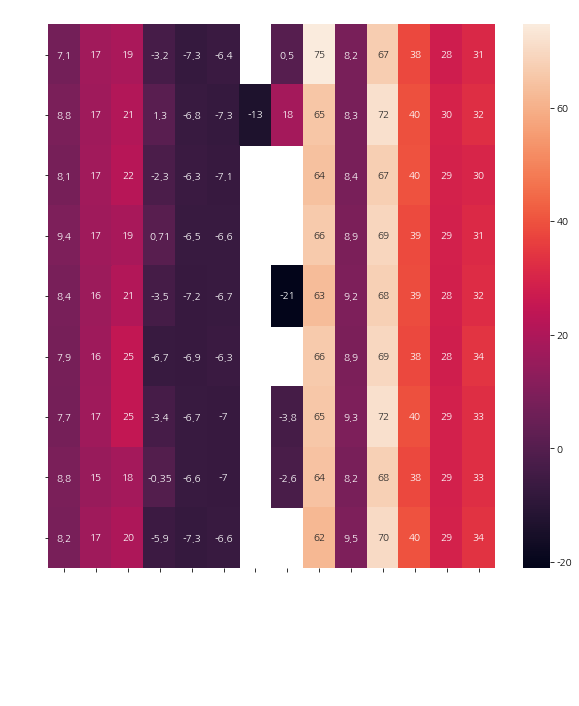

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(data = pivot, annot = True)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", fontsize = 15, color = "w")
plt.ylabel("STADIUM", fontsize = 15, color = "w")
plt.title("구장 별 타격결과 발사각도", color = "w", fontsize = 15)

In [43]:
pivot = HTS.pivot_table(index = "STADIUM", columns = "HIT_RESULT",values = "HIT_VEL")

Text(0.5, 1.0, '구장 별 타격결과 타구속도')

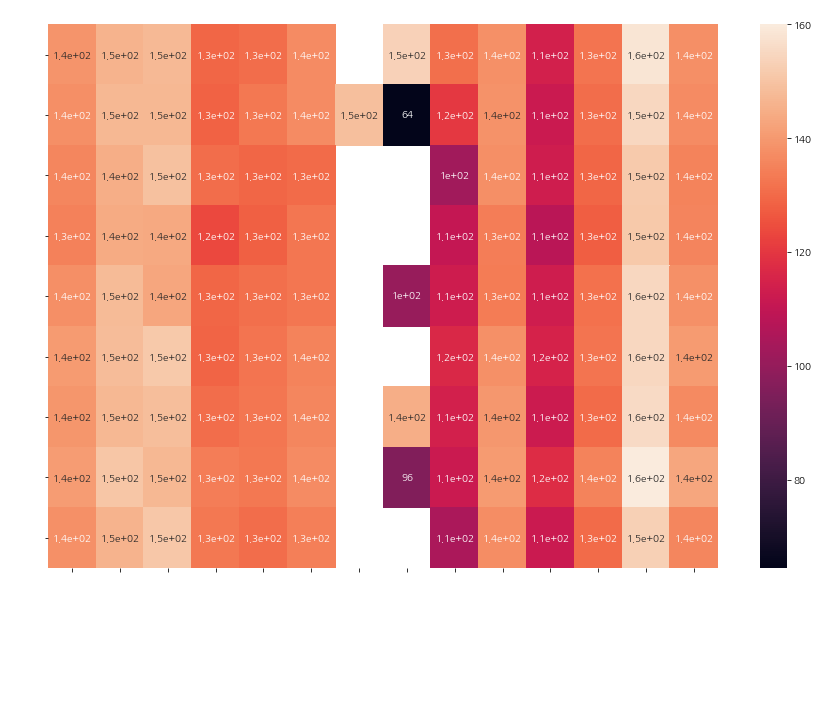

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(data = pivot, annot = True)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", fontsize = 15, color = "w")
plt.ylabel("STADIUM", fontsize = 15, color = "w")
plt.title("구장 별 타격결과 타구속도", color = "w", fontsize = 15)

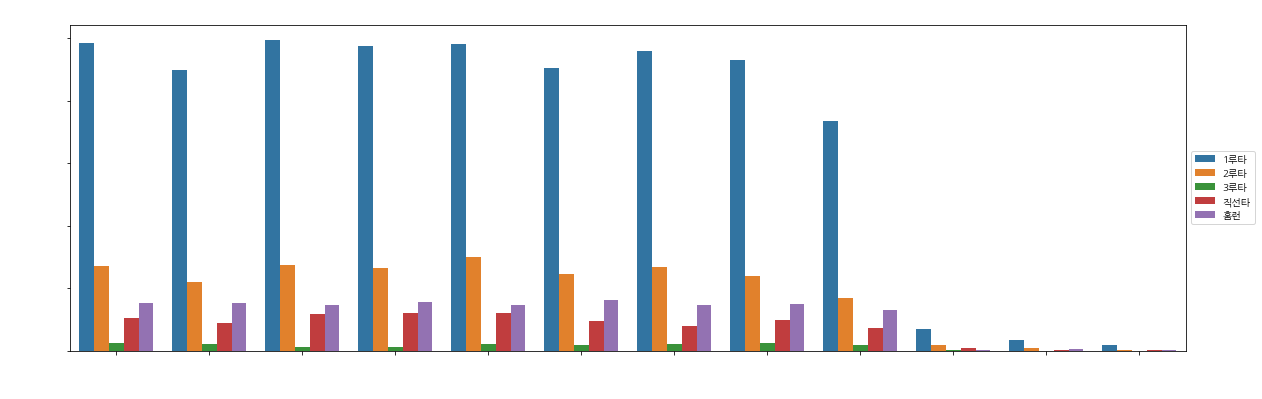

In [49]:
a = pd.DataFrame(HTS.groupby(["INN","HIT_RESULT"])["HIT_RESULT"].count())
a = a.rename(columns = {"HIT_RESULT" : "count"}).reset_index()
b = a[(a["HIT_RESULT"] == "1루타") | (a["HIT_RESULT"] == "2루타") | (a["HIT_RESULT"] == "3루타") | (a["HIT_RESULT"] == "홈런") | (a["HIT_RESULT"] == "직선타")]

plt.figure(figsize = (20,6))
sns.barplot(x = "INN", y = "count", data = b, hue = "HIT_RESULT")
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("INN", fontsize = 15, color = "w")
plt.ylabel("COUNT", fontsize = 15, color = "w")
plt.title("20년 이닝별결과", color = "w", fontsize = 15)
plt.legend(loc = "center left", bbox_to_anchor = (1,0.5))


In [50]:
b.groupby(["HIT_RESULT"])["count"].sum()

HIT_RESULT
1루타    8485
2루타    2290
3루타     181
직선타     917
홈런     1359
Name: count, dtype: int64

In [129]:
HIT_VEL_ANG_mean = HTS.groupby(["HIT_RESULT"])["HIT_VEL", "HIT_ANG_VER"].mean()
HIT_VEL_ANG_mean.loc[["홈런","1루타","2루타","3루타","직선타"]]

<ipython-input-129-2157134e4bc1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  HIT_VEL_ANG_mean = HTS.groupby(["HIT_RESULT"])["HIT_VEL", "HIT_ANG_VER"].mean()


,HIT_VEL,HIT_ANG_VER
HIT_RESULT,,
홈런,154.914121,28.776748
1루타,138.505971,8.335050
2루타,147.289389,16.528952
3루타,147.654365,20.378453
직선타,137.852672,8.733588


In [130]:
HIT_VEL_ANG_mean.loc[:]

,HIT_VEL,HIT_ANG_VER
HIT_RESULT,,
1루타,138.505971,8.335050
2루타,147.289389,16.528952
3루타,147.654365,20.378453
내야안타(1루타),130.247677,-2.305531
땅볼아웃,131.410165,-6.809245
병살타,134.931883,-6.778692
삼중살타,148.930000,-13.400000
야수선택,113.932000,-4.300000
인필드플라이,113.338058,65.063107


In [131]:
# 출루율 공식 (안타+사사구)÷(타수+사사구+희생플라이)

# batter_base 새로운 컬럼 추가(출루율)

batter_base["OBP"] = (batter_base["HIT"] + batter_base["BB"] + batter_base["HP"]) / (batter_base["AB"] + batter_base["BB"] + batter_base["HP"] + batter_base["SF"])
batter_base["OPS"] = batter_base["OBP"] + batter_base["SLG"]
batter_base.head(3)

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,AGE_VA,OBP,OPS
0,2020,50054,66,77,69,0.203,14,0,17,0.246,0,7,15,0,1,0,천성호,22,0.285714,0.531714
1,2020,50066,26,32,30,0.200,6,1,11,0.367,0,2,11,0,0,1,강현우,19,0.250000,0.617000
2,2020,50150,23,31,30,0.367,11,0,13,0.433,0,1,6,0,0,2,손호영,25,0.387097,0.820097


Text(0.5, 1.0, '20년 타수별 OPS')

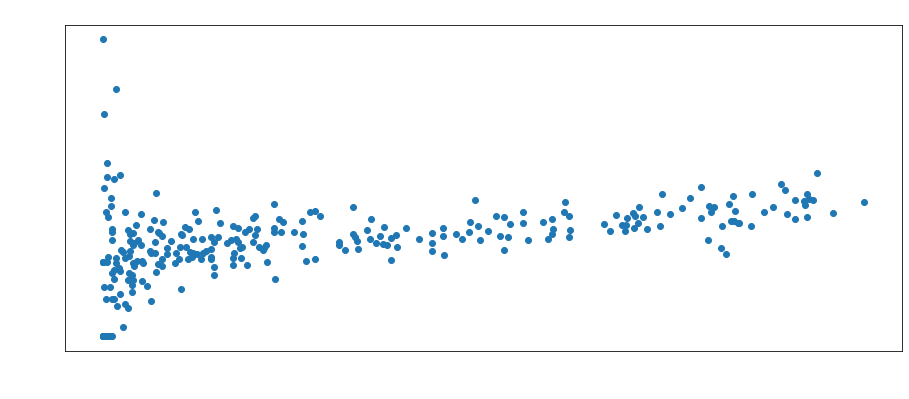

In [132]:
plt.figure(figsize=(15,6))
plt.plot("AB", "OPS", data = batter_base, marker = "o", linestyle = "none")
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("AB", fontsize = 15, color = "w")
plt.ylabel("OPS", fontsize = 15, color = "w")
plt.title("20년 타수별 OPS", color = "w", fontsize = 15)

In [133]:
# OPS 이상치 탐색을 위한 수치 정의

Q1 = batter_base["OPS"].quantile(0.25)
Q3 = batter_base["OPS"].quantile(0.75)
IQR = Q3 - Q1
# 실제 OPS 이상치 탐색

batter_base.loc[(batter_base["OPS"] < (Q1 - 1.5 * IQR)) | (batter_base["OPS"] > (Q3 + 1.5 * IQR))].sort_values(by = ["AB"], axis = 0, ascending = False)


,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,AGE_VA,OBP,OPS
79,2020,63448,14,18,16,0.000,0,0,0,0.0,0,1,5,0,0,0,김영환,27,0.058824,0.058824
140,2020,65514,14,18,11,0.455,5,2,11,1.0,0,7,2,0,0,1,강태율,23,0.666667,1.666667
213,2020,69995,2,8,8,0.000,0,0,0,0.0,0,0,2,0,0,0,서호철,23,0.000000,0.000000
115,2020,64501,4,7,7,0.000,0,0,0,0.0,0,0,2,0,0,0,배성근,25,0.000000,0.000000
89,2020,63913,6,6,6,0.000,0,0,0,0.0,0,0,4,0,0,1,최재원,29,0.000000,0.000000
175,2020,67644,3,4,4,0.000,0,0,0,0.0,0,0,2,0,0,0,이정훈,25,0.000000,0.000000
132,2020,65304,16,6,4,0.500,2,0,2,0.5,0,1,1,0,1,1,김은성,27,0.666667,1.166667
6,2020,50208,5,4,4,0.000,0,0,0,0.0,0,0,1,0,0,0,오명진,18,0.000000,0.000000
76,2020,63339,12,5,4,0.000,0,0,0,0.0,0,0,1,0,0,0,김민준,26,0.000000,0.000000
128,2020,65040,2,3,3,0.000,0,0,0,0.0,0,0,1,0,0,0,김태훈,24,0.000000,0.000000


# 배럴 타구 정의

In [134]:
# Barrel_Hit 함수 정의

# Barrel_Hit(df, 타구속도, 타구각도1, 타구각도2)

def Barrel_Hit(df, HIT_VEL, HIT_ANG_VER1, HIT_ANG_VER2):
    df_copy = df.copy()
    df_copy = df_copy[
                                    (df_copy["HIT_VEL"] >= HIT_VEL) & \
                                    (df_copy["HIT_ANG_VER"] >= HIT_ANG_VER1) & \
                                    (df_copy["HIT_ANG_VER"] <= HIT_ANG_VER2).reset_index(drop = True)]
                                    
    # 장타율 계산

    # 분모 : 타수 => 행 길이
    #print("장타율계산")

    #print("분모 : {}".format(len(df_copy)))
    denominator = len(df_copy)

    # 분자 : 1루타 * 1 + 2루타 * 2 + 3루타 * 3 + 홈런 * 4
    
    temp = pd.Series(data = [0,0,0,0], index = ["1루타", "2루타", "3루타", "홈런"])
    
    for i in df_copy["HIT_RESULT"].value_counts().keys():
        temp[i] = df_copy["HIT_RESULT"].value_counts()[i]

    numerator = (temp["1루타"] * 1) + (temp["2루타"] * 2) + \
                (temp["3루타"] * 3) + (temp["홈런"] * 4)

    #print("분자 : {}".format(numerator))

    # 장타율
    OBP = numerator / denominator
    #print("장타율 : " , OBP)

    #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    #print("-" * 50)
    # 타율 계산


    # 분모 : 티수 => 행 길이
    #print("타율계산")

    #print("분모 : {}".format(len(df_copy)))
    denominator = len(df_copy)

    # 분자 : 1루타, 2루타, 3루타, 홈런 개수 합
    numerator = (temp["1루타"] + temp["2루타"] + \
                temp["3루타"] + temp["홈런"])

    #print("분자 : {}".format(numerator))

    # 타율

    avg = numerator / denominator
    #print("타율" , avg)
    
    #-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
    Barrel = (OBP / 1.5) * (avg / 0.5)
    
    #print(Barrel)
    
    dictionary = {"장타율" : OBP,
                  "타율" : avg,
                  "Barrel" : Barrel}
    return dictionary
    
    #print(dictionary)

# 동명이인 처리

In [135]:
#동명이인 처리

score["선수명"].value_counts() # 노수광 39득점 21타점, 오태곤36득점 35타점, 이홍구5득점 8타점, 김태진28득점 23타점 

노수광    2
오태곤    2
이홍구    2
김태진    2
서건창    1
      ..
권희동    1
오윤석    1
이창진    1
변상권    1
로맥     1
Name: 선수명, Length: 210, dtype: int64

In [136]:
batter_base["PCODE"].value_counts().sort_values(ascending= False)

76290    1
79192    1
64006    1
64007    1
67207    1
        ..
65515    1
65514    1
74729    1
74215    1
79334    1
Name: PCODE, Length: 286, dtype: int64

In [154]:
#KBReport 선수기록
score_name = list(score["선수명"])
score_R = list(score["득점"])
score_RBI = list(score["타점"])

score_name_R = dict(list(zip(score_name, score_R)))
score_name_RBI = dict(list(zip(score_name, score_RBI)))


HTS_grouped_PCODE = HTS.groupby(["PCODE"])["HIT_VEL", "HIT_ANG_VER"].median() # 평균값, 중앙값 해보기
HTS_grouped_PCODE = HTS_grouped_PCODE.reset_index()

HTS_grouped_PCODE["R"] = pd.Series()
HTS_grouped_PCODE["RBI"] = pd.Series()
HTS_grouped_PCODE["NAME"] = pd.Series()

HTS_grouped_PCODE["NAME"] = HTS_grouped_PCODE["PCODE"].map(players_name_number)
HTS_grouped_PCODE["R"] = HTS_grouped_PCODE["NAME"].map(score_name_R).apply(lambda x : 0 if pd.isnull(x) else x)
HTS_grouped_PCODE["RBI"] = HTS_grouped_PCODE["NAME"].map(score_name_RBI).apply(lambda x : 0 if pd.isnull(x) else x)

HTS_grouped_PCODE = HTS_grouped_PCODE[(HTS_grouped_PCODE["R"] != 0) | HTS_grouped_PCODE["RBI"] != 0].reset_index(drop = True)

print(HTS_grouped_PCODE)

     PCODE  HIT_VEL  HIT_ANG_VER     R   RBI NAME
0    50054  132.615        14.90   9.0   1.0  천성호
1    50066  136.190         9.60   2.0   3.0  강현우
2    50150  129.595        20.25   9.0   3.0  손호영
3    50165  150.320        22.95  74.0  86.0  라모스
4    50202  135.930         5.90  10.0   3.0  안권수
..     ...      ...          ...   ...   ...  ...
206  79334  135.610        20.80   1.0   2.0  장영석
207  79365  141.180        13.70  45.0  50.0  박동원
208  79402  136.720        12.15  71.0  47.0  김상수
209  79456  132.360         8.10  22.0  36.0  이지영
210  79608  135.710        15.60  49.0  54.0  안치홍

[211 rows x 6 columns]


<ipython-input-154-f9d765c6c55c>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  HTS_grouped_PCODE = HTS.groupby(["PCODE"])["HIT_VEL", "HIT_ANG_VER"].median() # 평균값, 중앙값 해보기
<ipython-input-154-f9d765c6c55c>:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  HTS_grouped_PCODE["R"] = pd.Series()
<ipython-input-154-f9d765c6c55c>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  HTS_grouped_PCODE["RBI"] = pd.Series()
<ipython-input-154-f9d765c6c55c>:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  HTS_grouped_PCODE["NAME"] = pd.Series()


In [155]:
HTS_grouped_PCODE[(HTS_grouped_PCODE["NAME"] == "노수광") | (HTS_grouped_PCODE["NAME"] == "오태곤") |\
                  (HTS_grouped_PCODE["NAME"] == "이홍구") | (HTS_grouped_PCODE["NAME"] == "김태진")]

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME
22,60558,139.045,12.05,7.0,5.0,오태곤
62,63634,132.055,27.65,3.0,3.0,이홍구
63,63704,129.950,12.90,26.0,16.0,노수광
91,64984,129.410,14.00,18.0,17.0,김태진


In [156]:
# 노수광, 오태곤, 이홍구, 김태진 

#print(HTS_grouped_PCODE[(HTS_grouped_PCODE["NAME"] == "강승호") | (HTS_grouped_PCODE["NAME"] == "이우성") | (HTS_grouped_PCODE["NAME"] == "김재현") ])

HTS_grouped_PCODE.loc[63, "R"] = 39
HTS_grouped_PCODE.loc[63, "RBI"] = 21

HTS_grouped_PCODE.loc[22, "R"] = 36
HTS_grouped_PCODE.loc[22, "RBI"] = 35

HTS_grouped_PCODE.loc[62, "R"] = 5
HTS_grouped_PCODE.loc[62, "RBI"] = 8

HTS_grouped_PCODE.loc[91, "R"] = 28
HTS_grouped_PCODE.loc[91, "RBI"] = 23

#print(HTS_grouped_PCODE[(HTS_grouped_PCODE["NAME"] == "강승호") | (HTS_grouped_PCODE["NAME"] == "이우성") | (HTS_grouped_PCODE["NAME"] == "김재현") ])

print(HTS_grouped_PCODE["PCODE"].value_counts())


76802    1
62353    1
62802    1
78168    1
64346    1
        ..
65869    1
64300    1
62931    1
68305    1
79334    1
Name: PCODE, Length: 211, dtype: int64


In [157]:
# final_batter_base는 batter_base에 타점,득점, 타구속도, 발사각도 추가 



final_batter_base = batter_base.copy()
final_batter_base = final_batter_base[final_batter_base["AB"] > 30]
final_batter_base["R"] = pd.Series()
final_batter_base["RBI"] = pd.Series()
final_batter_base["HIT_VEL"] = pd.Series()
final_batter_base["HIT_ANG_VER"] = pd.Series()

final_batter_base



<ipython-input-157-78fc6683b67f>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["R"] = pd.Series()
<ipython-input-157-78fc6683b67f>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["RBI"] = pd.Series()
<ipython-input-157-78fc6683b67f>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_VEL"] = pd.Series()
<ipython-input-157-78fc6683b67f>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_ANG_VER"] = pd.Series()


,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,...,HP,GD,NAME,AGE_VA,OBP,OPS,R,RBI,HIT_VEL,HIT_ANG_VER
0,2020,50054,66,77,69,0.203,14,0,17,0.246,...,1,0,천성호,22,0.285714,0.531714,NaN,NaN,NaN,NaN
3,2020,50165,117,494,431,0.278,120,38,255,0.592,...,4,7,라모스,25,0.362348,0.954348,NaN,NaN,NaN,NaN
4,2020,50202,68,41,37,0.270,10,0,10,0.270,...,0,1,안권수,27,0.300000,0.570000,NaN,NaN,NaN,NaN
8,2020,50300,10,37,35,0.114,4,1,7,0.200,...,0,0,모터,30,0.135135,0.335135,NaN,NaN,NaN,NaN
10,2020,50350,65,271,244,0.254,62,2,82,0.336,...,2,6,러셀,26,0.317343,0.653343,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2020,79334,11,37,31,0.129,4,0,4,0.129,...,1,3,장영석,30,0.243243,0.372243,NaN,NaN,NaN,NaN
281,2020,79365,112,372,324,0.250,81,12,138,0.426,...,6,10,박동원,30,0.337838,0.763838,NaN,NaN,NaN,NaN
282,2020,79402,120,471,404,0.304,123,5,162,0.401,...,8,16,김상수,30,0.396588,0.797588,NaN,NaN,NaN,NaN
283,2020,79456,101,289,262,0.309,81,0,95,0.363,...,4,8,이지영,34,0.363636,0.726636,NaN,NaN,NaN,NaN


In [158]:
HTS_grouped_PCODE_PCODE = list(HTS_grouped_PCODE["PCODE"])
HTS_grouped_PCODE_NAME = list(HTS_grouped_PCODE["NAME"])
HTS_grouped_PCODE_HIT_VEL = list(HTS_grouped_PCODE["HIT_VEL"])
HTS_grouped_PCODE_HIT_ANG_VER = list(HTS_grouped_PCODE["HIT_ANG_VER"])
HTS_grouped_PCODE_R = list(HTS_grouped_PCODE["R"])
HTS_grouped_PCODE_RBI = list(HTS_grouped_PCODE["RBI"])

In [159]:
HTS_PCODE_HIT_VEL = dict(list(zip(HTS_grouped_PCODE_PCODE, HTS_grouped_PCODE_HIT_VEL)))
HTS_PCODE_HIT_ANG_VER = dict(list(zip(HTS_grouped_PCODE_PCODE, HTS_grouped_PCODE_HIT_ANG_VER)))
HTS_PCODE_R = dict(list(zip(HTS_grouped_PCODE_PCODE, HTS_grouped_PCODE_R)))
HTS_PCODE_RBI = dict(list(zip(HTS_grouped_PCODE_PCODE, HTS_grouped_PCODE_RBI)))

In [160]:
final_batter_base["R"] = final_batter_base["PCODE"].map(HTS_PCODE_R).apply(lambda x : 0 if pd.isnull(x) else x)
final_batter_base["RBI"] = final_batter_base["PCODE"].map(HTS_PCODE_RBI).apply(lambda x : 0 if pd.isnull(x) else x)
final_batter_base["HIT_VEL"] = final_batter_base["PCODE"].map(HTS_PCODE_HIT_VEL).apply(lambda x : 0 if pd.isnull(x) else x)
final_batter_base["HIT_ANG_VER"] = final_batter_base["PCODE"].map(HTS_PCODE_HIT_ANG_VER).apply(lambda x : 0 if pd.isnull(x) else x)

final_batter_base = HTS_grouped_PCODE.merge(final_batter_base)

In [161]:
final_batter_base

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME,GYEAR,GAMENUM,PA,AB,...,SLG,SF,BB,KK,IB,HP,GD,AGE_VA,OBP,OPS
0,50054,132.615,14.90,9.0,1.0,천성호,2020,66,77,69,...,0.246,0,7,15,0,1,0,22,0.285714,0.531714
1,50165,150.320,22.95,74.0,86.0,라모스,2020,117,494,431,...,0.592,4,55,136,5,4,7,25,0.362348,0.954348
2,50202,135.930,5.90,10.0,3.0,안권수,2020,68,41,37,...,0.270,1,2,5,0,0,1,27,0.300000,0.570000
3,50300,142.940,30.70,4.0,3.0,모터,2020,10,37,35,...,0.200,1,1,10,0,0,0,30,0.135135,0.335135
4,50350,141.190,14.75,22.0,31.0,러셀,2020,65,271,244,...,0.336,3,22,37,1,2,6,26,0.317343,0.653343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,79334,135.610,20.80,1.0,2.0,장영석,2020,11,37,31,...,0.129,1,4,7,0,1,3,30,0.243243,0.372243
201,79365,141.180,13.70,45.0,50.0,박동원,2020,112,372,324,...,0.426,2,38,68,0,6,10,30,0.337838,0.763838
202,79402,136.720,12.15,71.0,47.0,김상수,2020,120,471,404,...,0.401,2,55,55,1,8,16,30,0.396588,0.797588
203,79456,132.360,8.10,22.0,36.0,이지영,2020,101,289,262,...,0.363,1,19,28,1,4,8,34,0.363636,0.726636


In [178]:
final_batter_base[["BA", "SLG","R","RBI"]].corr()

,BA,SLG,R,RBI
BA,1.000000,0.800361,0.598735,0.593642
SLG,0.800361,1.000000,0.688530,0.779751
R,0.598735,0.688530,1.000000,0.890703
RBI,0.593642,0.779751,0.890703,1.000000


In [162]:
final_batter_base[(final_batter_base["OBP"] == 0) | (final_batter_base["OPS"] == 0)]

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME,GYEAR,GAMENUM,PA,AB,...,SLG,SF,BB,KK,IB,HP,GD,AGE_VA,OBP,OPS


In [163]:
final_batter_base[final_batter_base["AB"] < 30]

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME,GYEAR,GAMENUM,PA,AB,...,SLG,SF,BB,KK,IB,HP,GD,AGE_VA,OBP,OPS


In [164]:
final_batter_base.to_csv("./final20.csv", index =False)

In [165]:
Barrel_Hit(HTS, 145, 15,28)

{'장타율': 1.6611781924624953,
 '타율': 0.6084888401024515,
 'Barrel': 1.3477445220466544}

In [170]:
#HTS_123H = HTS[(HTS["HIT_RESULT"] == "1루타") | (HTS["HIT_RESULT"] == "2루타") |(HTS["HIT_RESULT"] == "3루타") | (HTS["HIT_RESULT"] == "홈런")]
#HTS_23H = HTS[(HTS["HIT_RESULT"] == "2루타") |(HTS["HIT_RESULT"] == "3루타") | (HTS["HIT_RESULT"] == "홈런")]




final_batter_base["HIT_ANG25"] = pd.Series()
final_batter_base["HIT_ANG75"] = pd.Series()
final_batter_base["HIT_ANG50"] = pd.Series()

final_batter_base_name = list(final_batter_base["NAME"])
HIT_ANG25 = []
HIT_ANG75 = []
HIT_ANG50 = []

for i in final_batter_base_name :
    HIT_ANG25.append((HTS[HTS["NAME"] == i]).describe().loc["25%","HIT_ANG_VER"])
    HIT_ANG75.append((HTS[HTS["NAME"] == i]).describe().loc["75%","HIT_ANG_VER"])
    HIT_ANG50.append((HTS[HTS["NAME"] == i]).describe().loc["50%","HIT_ANG_VER"])

    
NAME_HIT_ANG25 = dict(list(zip(final_batter_base_name, HIT_ANG25)))
NAME_HIT_ANG75 = dict(list(zip(final_batter_base_name, HIT_ANG75)))
NAME_HIT_ANG50 = dict(list(zip(final_batter_base_name, HIT_ANG50)))

final_batter_base["HIT_ANG25"] = final_batter_base["NAME"].map(NAME_HIT_ANG25)
final_batter_base["HIT_ANG75"] = final_batter_base["NAME"].map(NAME_HIT_ANG75)
final_batter_base["HIT_ANG50"] = final_batter_base["NAME"].map(NAME_HIT_ANG50)

final_batter_base["Barrel"] = pd.Series()

for i in range(final_batter_base.shape[0]):
    final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]

<ipython-input-170-6267ac9dbfb8>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_ANG25"] = pd.Series()
<ipython-input-170-6267ac9dbfb8>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_ANG75"] = pd.Series()
<ipython-input-170-6267ac9dbfb8>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_ANG50"] = pd.Series()
<ipython-input-170-6267ac9dbfb8>:30: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["Barrel"] = pd.Series()
<ipyth

<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-170-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [168]:
final_batter_base["HIT_VEL25"] = pd.Series()
final_batter_base["HIT_VEL75"] = pd.Series()
final_batter_base["HIT_VEL50"] = pd.Series()

final_batter_base_name = list(final_batter_base["NAME"])
HIT_VEL25 = []
HIT_VEL75 = []
HIT_VEL50 = []

for i in final_batter_base_name :
    HIT_VEL25.append((HTS[HTS["NAME"] == i]).describe().loc["25%","HIT_VEL"])
    HIT_VEL75.append((HTS[HTS["NAME"] == i]).describe().loc["75%","HIT_VEL"])
    HIT_VEL50.append((HTS[HTS["NAME"] == i]).describe().loc["50%","HIT_VEL"])

    
NAME_HIT_VEL25 = dict(list(zip(final_batter_base_name, HIT_VEL25)))
NAME_HIT_VEL75 = dict(list(zip(final_batter_base_name, HIT_VEL75)))
NAME_HIT_VEL50 = dict(list(zip(final_batter_base_name, HIT_VEL50)))

final_batter_base["HIT_VEL25"] = final_batter_base["NAME"].map(NAME_HIT_VEL25)
final_batter_base["HIT_VEL75"] = final_batter_base["NAME"].map(NAME_HIT_VEL75)
final_batter_base["HIT_VEL50"] = final_batter_base["NAME"].map(NAME_HIT_VEL50)

<ipython-input-168-aa522e9287dc>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_VEL25"] = pd.Series()
<ipython-input-168-aa522e9287dc>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_VEL75"] = pd.Series()
<ipython-input-168-aa522e9287dc>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_VEL50"] = pd.Series()


In [171]:
final_batter_base.corr()[["OBP","SLG","OPS"]]

,OBP,SLG,OPS
PCODE,0.193675,0.184890,0.198813
HIT_VEL,0.350480,0.581723,0.525166
HIT_ANG_VER,-0.021734,0.222722,0.140622
R,0.622948,0.688530,0.702270
RBI,0.588898,0.779751,0.750116
GYEAR,NaN,NaN,NaN
GAMENUM,0.494447,0.507594,0.531370
PA,0.597270,0.649528,0.666215
AB,0.579442,0.646643,0.657373
BA,0.874595,0.800361,0.874665


In [167]:
final_batter_base.corr()[["SLG", "OBP","OPS"]].loc["Barrel"]

SLG    0.625416
OBP    0.347480
OPS    0.553243
Name: Barrel, dtype: float64

In [172]:
HTS[HTS["HIT_RESULT"] == "2루타"]["HIT_VEL"].describe().loc[["25%", "50%", "75%"]]

25%    141.6125
50%    149.7900
75%    155.8200
Name: HIT_VEL, dtype: float64

In [173]:
HTS[HTS["HIT_RESULT"] == "2루타"]["HIT_ANG_VER"].describe().loc[["25%", "50%", "75%"]]

25%    11.325
50%    17.000
75%    22.300
Name: HIT_ANG_VER, dtype: float64

In [174]:
HTS[HTS["HIT_RESULT"] == "3루타"]["HIT_VEL"].describe().loc[["25%", "50%", "75%"]]

25%    143.25
50%    148.85
75%    154.60
Name: HIT_VEL, dtype: float64

In [175]:
HTS[HTS["HIT_RESULT"] == "3루타"]["HIT_ANG_VER"].describe().loc[["25%", "50%", "75%"]]

25%    14.1
50%    20.9
75%    27.3
Name: HIT_ANG_VER, dtype: float64

In [176]:
HTS[HTS["HIT_RESULT"] == "홈런"]["HIT_VEL"].describe().loc[["25%", "50%", "75%"]]

25%    150.00
50%    155.23
75%    159.71
Name: HIT_VEL, dtype: float64

In [177]:
HTS[HTS["HIT_RESULT"] == "홈런"]["HIT_ANG_VER"].describe().loc[["25%", "50%", "75%"]]

25%    24.6
50%    28.0
75%    32.5
Name: HIT_ANG_VER, dtype: float64